In [16]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### 데이터 생성

In [2]:
np.random.seed(4) # 랜덤한 값 생성
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3)) # 세 개의 좌표를 갖는 행렬 X
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [5]:
X[:5,]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

### Singular Vector Decomposition 

In [8]:
X_centered = X - X.mean(axis=0) # X에서 각 열의 평균값 만큼 감소시킴 ~ 평균으로부터 얼마나 멀리 떨어져 있는지
U, s, Vt = np.linalg.svd(X_centered) # SVD ~ 세 개의 행렬(U, s, Vt)로 분해가 됨. Vt에 주성분이 있음
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [25]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [26]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

In [20]:
U.shape

(60, 60)

In [21]:
s.shape

(3,)

In [22]:
Vt.shape

(3, 3)

In [28]:
W2 = Vt.T[:, :2] # 2개의 열만 추출해서 W2에 넣음
X2D = X_centered.dot(W2) # 행렬곱 사용하여 W2 곱하면
X2D[:5,] # 2차원으로 축소된 것 확인

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

### 주성분 분석

In [29]:
from sklearn.decomposition import PCA

# PCA에서 X_centered 과정 모두 진행됨
pca = PCA(n_components = 2) # 차원을 2로 줄이겠다.
X2Dpca = pca.fit_transform(X) # pca에 데이터 X를 넣으면 2차원으로 축소된 데이터를 구할 수 있다.

X2Dpca[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [30]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

앞의 결과와 부호만 상이하고 값의 크기는 같음. 같은 직선을 방향만 반대로 정의

In [31]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

두 개의 주성분이 얼마나 분산을 설명해주는지에 대한 값이 나온다. 첫 번째 주성분: 84.24%, 두 번째 주성분: 14.63%, 총합: 98.87%

In [32]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

1.1% 정도의 분산만을 설명하지 못한다. 정보의 손실이 별로 없다고 볼 수 있다.

### 적절한 차원의 수 선택

In [33]:
# 설명할 분산의 수준 지정

pca = PCA(n_components = 0.95) # 실수로 넣을 경우 ~ 분산이 95%는 보존되게끔 차원의 수를 맞추어서 차원을 축소하라고 지정이 됨
X_reduced = pca.fit_transform(X) # X가 차원이 축소된 형태로 나오게 됨

In [34]:
pca.components_ #두 개의 차원일 때 95%가 넘었기 때문에 두 개로 축소가 되는 것을 볼 수 있음

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

### PCA 적용

In [35]:
import pandas as pd

cancer = pd.read_csv('data/breast-cancer.csv')
cancer.head()
# class ~ 2: 양성, 4: 악성 / 9개의 속성들을 가지고 있음. 9차원 공간 시각화가 어렵기 때문에 차원 축소가 이루어져야 함

,code,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
X = cancer.drop(['code','class'], axis=1)
y = cancer['class']

In [37]:
X.head()

,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [38]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X) # 표준화 수행
X_scaled[:5]

array([[ 0.20693572, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.68474569, -0.17586909, -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 ,  0.76862067,  1.71010564,
         1.80383614, -0.17586909, -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.4082366 , -0.17586909, -0.61182504, -0.34391178],
       [ 0.56233637,  1.59563215,  1.61377302, -0.63324716, -0.09762796,
         0.14478158, -0.17586909,  1.35445405, -0.34391178],
       [-0.14846494, -0.69999505, -0.74329904,  0.06768675, -0.54956136,
        -0.68474569, -0.17586909, -0.61182504, -0.34391178]])

In [41]:
pca = PCA(n_components = 2) # PCA 2차원으로 지정하여 수행
X_reduced = pca.fit_transform(X_scaled)

In [42]:
pca.components_ # 9개의 속성값 가지고 있는 2개의 주성분이 추출됨

array([[ 0.30327434,  0.38139476,  0.37789713,  0.33280777,  0.33664797,
         0.33286015,  0.34492741,  0.33576637,  0.23055098],
       [-0.15199451, -0.0495235 , -0.08633347, -0.04226448,  0.16478284,
        -0.25006174, -0.22939596,  0.02836101,  0.90669412]])

In [43]:
pca.explained_variance_ratio_

array([0.65322102, 0.08590219])

첫 번째 주성분: 65.3%, 두 번째 주성분: 8.50%, 총합: 74.8%

In [45]:
X_reduced[:5]

array([[-1.4541711 , -0.11401214],
       [ 1.46845176, -0.54984684],
       [-1.57770004, -0.07511858],
       [ 1.50835316, -0.56240928],
       [-1.32867875, -0.08961779]])

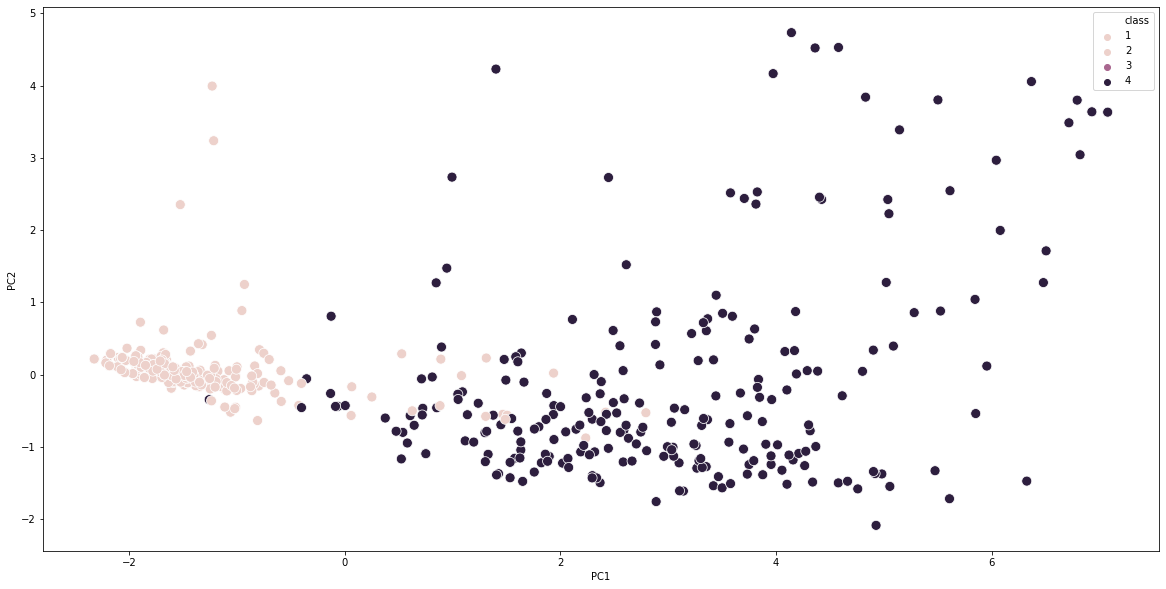

In [50]:
import seaborn as sns

plt.figure(figsize=(20, 10))
ax = sns.scatterplot(X_reduced[:,0], X_reduced[:,1], hue=y, s=100)
ax.set(xlabel='PC1', ylabel='PC2')
plt.show()

연한 색이 양성인 경우, 검은 색이 악성인 경우. ~ 주성분 1과 관련하여 오른쪽으로 갈수록 악성이 많고 왼쪽으로 갈수록 양성이 많다. 주성분 2로는 설명이 잘 안 됨. 중간 영역을 보면 데이터가 많이 섞여있기 때문에 이 부분에 대해서는 완벽하게 설명하기 어려운 데이터들이 있음을 시각화를 통해 볼 수 있다. 

### 랜덤 PCA

In [51]:
pca = PCA(n_components = 2, svd_solver='randomized') # 랜덤 PCA 수행
X_random = pca.fit_transform(X_scaled)

In [52]:
pca.components_

array([[ 0.30327434,  0.38139476,  0.37789713,  0.33280777,  0.33664797,
         0.33286015,  0.34492741,  0.33576637,  0.23055098],
       [-0.15199451, -0.0495235 , -0.08633347, -0.04226448,  0.16478284,
        -0.25006174, -0.22939596,  0.02836101,  0.90669412]])

In [53]:
pca.explained_variance_ratio_

array([0.65322102, 0.08590219])

In [55]:
X_random[:5]

array([[-1.4541711 , -0.11401214],
       [ 1.46845176, -0.54984684],
       [-1.57770004, -0.07511858],
       [ 1.50835316, -0.56240928],
       [-1.32867875, -0.08961779]])

## 다차원 척도법

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [56]:
protein = pd.read_csv('data/protein.csv')
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [58]:
X = protein.drop(['Country'], axis=1)
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [59]:
scaler = MinMaxScaler() # 표준화
X_scaled = scaler.fit_transform(X)

In [60]:
mds = MDS(n_components = 2) # 2차원으로 줄임 PCA -> MDS로
X_2d = mds.fit_transform(X_scaled)

In [64]:
X_2d

array([[ 0.72698782,  1.03052928],
       [-0.4740219 , -0.49411005],
       [-0.41096796, -0.07199515],
       [ 0.90108824,  0.44809391],
       [-0.08582198, -0.10036236],
       [-0.78515705,  0.12224222],
       [-0.55429794, -0.16427425],
       [-0.52190253,  0.69934157],
       [-0.27467083, -0.75464486],
       [ 0.97640589, -0.09582655],
       [ 0.45215891, -0.1920864 ],
       [-0.86080522, -0.15180093],
       [ 0.55677576, -0.01316874],
       [-0.49704415, -0.35839135],
       [-0.32628703,  0.49527337],
       [ 0.09174577, -0.48419404],
       [ 0.84793484, -0.97124512],
       [ 0.63483759,  0.5136767 ],
       [ 0.65472165, -0.57625167],
       [-0.5094464 ,  0.32827761],
       [-0.19131072, -0.31493898],
       [-0.74436359,  0.34546672],
       [ 0.16297524,  0.44611962],
       [-0.63210576, -0.31121877],
       [ 0.86257138,  0.62548821]])

In [85]:
X_r = pd.DataFrame(X_2d) #데이터 프레임으로 변경하여

In [86]:
X_r['Country'] = protein['Country'] #Country 칼럼 추가

In [89]:
X_r.head()

,0,1,Country
0,0.726988,1.030529,Albania
1,-0.474022,-0.494110,Austria
2,-0.410968,-0.071995,Belgium
3,0.901088,0.448094,Bulgaria
4,-0.085822,-0.100362,Czechoslovakia


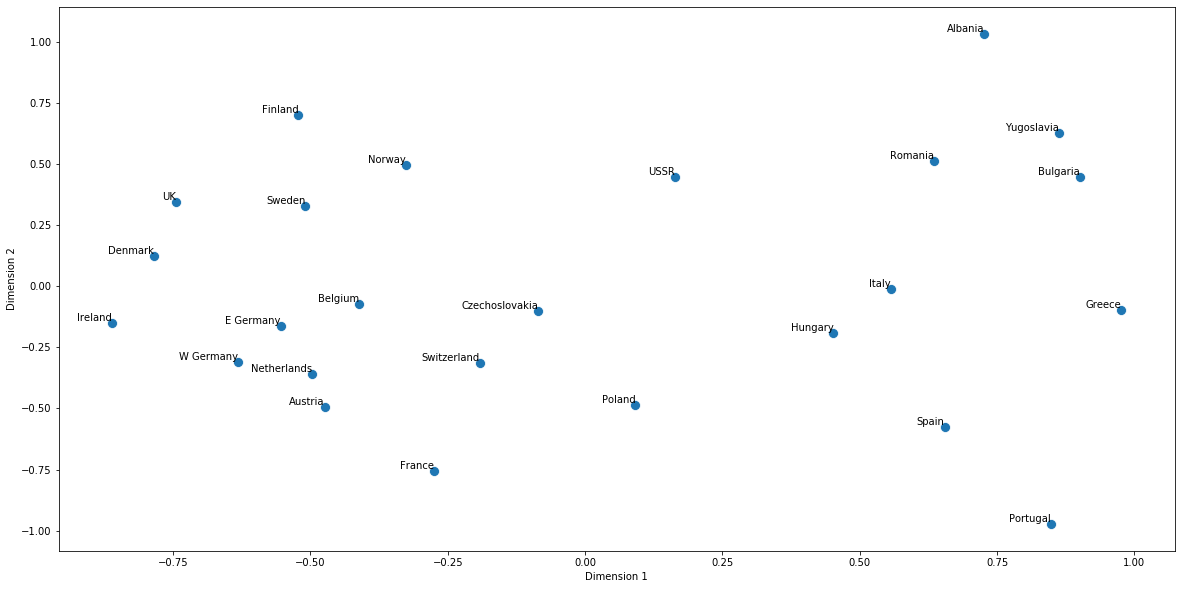

In [96]:
import seaborn as sns

plt.figure(figsize=(20, 10))
ax = sns.scatterplot(X_r[0], X_r[1], s=100)
ax.set(xlabel='Dimension 1', ylabel='Dimension 2')

# label points on the plot
x = X_r[0] # 2차원으로 줄인 것의 첫 번째 좌표값
y = X_r[1] # 2차원으로 줄인 것의 두 번째 좌표값
names = X_r['Country']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()

### 위의 예를 PCA로도 수행

In [97]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_scaled)

In [98]:
X_pca = pd.DataFrame(X_reduced)
X_pca['Country'] = protein['Country']
X_pca.head()

,0,1,Country
0,0.970745,-0.447788,Albania
1,-0.426424,-0.266672,Austria
2,-0.435920,0.062134,Belgium
3,0.853018,-0.367135,Bulgaria
4,-0.148997,-0.160445,Czechoslovakia


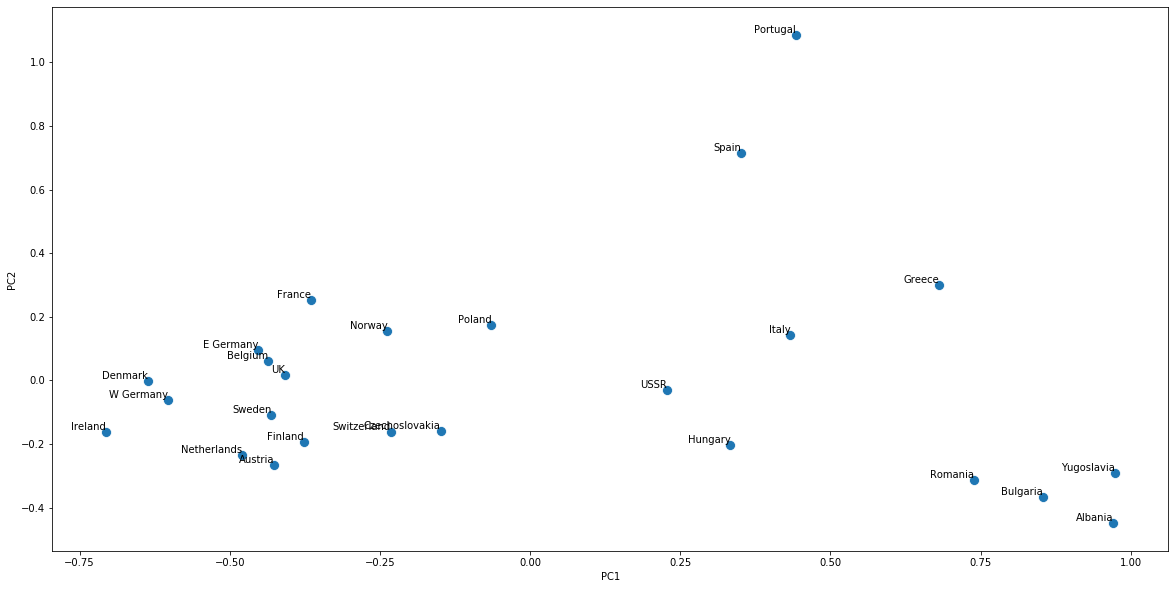

In [99]:
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(X_pca[0], X_pca[1], s=100)
ax.set(xlabel='PC1', ylabel='PC2')

x = X_pca[0]
y = X_pca[1]
names = X_pca['Country']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()

## 연습문제

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [101]:
speakers = pd.read_csv('data/senti_final_T.csv') # 인공지능 스피커 사용기
speakers.head()

,category,Design,Price,Sound,Portability,Voice Recognition,App Control,Music,Information,Convenience
0,sk,0.495841,0.549718,0.484794,0.479233,0.521475,0.481672,0.524000,0.534306,0.525793
1,naver,0.368778,0.412791,0.313043,0.360215,0.347552,0.330769,0.380573,0.354140,0.374868
2,lg,0.642412,0.000000,0.000000,0.000000,0.636905,0.616185,0.701408,0.650108,0.635185
3,kt,0.503263,0.563762,0.506127,0.500531,0.536781,0.528256,0.532591,0.543436,0.541343
4,kakao,0.461356,0.493343,0.430045,0.321945,0.000000,0.483298,0.516645,0.525242,0.487525


In [102]:
speakers_value = speakers.drop(['category'], axis=1)

### PCA

In [114]:
pca = PCA(n_components = 2)
speakers_pca = pca.fit_transform(speakers_value)

In [115]:
df = pd.DataFrame(speakers_pca)
df['category'] = speakers['category']
df.head()

,0,1,category
0,-0.168682,-0.214316,sk
1,-0.157197,0.137751,naver
2,0.737731,0.019685,lg
3,-0.175304,-0.254137,kt
4,-0.236548,0.311017,kakao


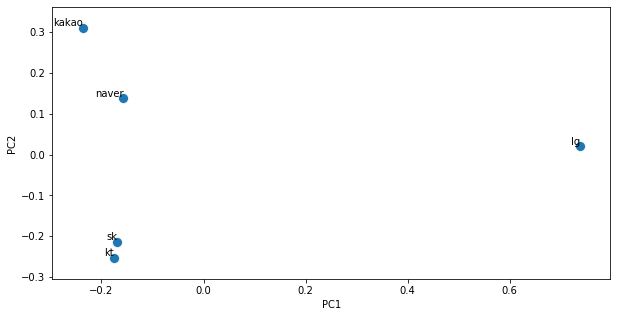

In [116]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(df[0], df[1], s=100)
ax.set(xlabel='PC1', ylabel='PC2')

x = df[0]
y = df[1]
names = df['category']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()

lg는 다른 제품들이랑 동떨어진 인식, kakao와 naver이 비슷하고, sk와 kt가 비슷하다.

### MDS 

In [108]:
mds = MDS(n_components = 2)
speakers_mds = mds.fit_transform(speakers_value)

In [109]:
df = pd.DataFrame(speakers_mds)
df['category'] = speakers['category']
df.head()

,0,1,category
0,-0.291130,-0.051059,sk
1,0.125566,-0.092449,naver
2,0.353550,0.659308,lg
3,-0.337491,-0.077136,kt
4,0.149505,-0.438664,kakao


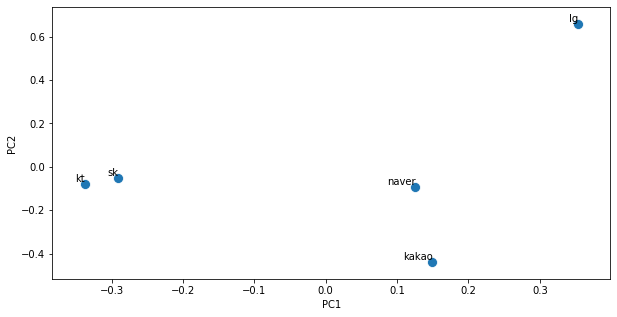

In [113]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(df[0], df[1], s=100)
ax.set(xlabel='PC1', ylabel='PC2')

x = df[0]
y = df[1]
names = df['category']

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

plt.show()